In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [87]:
data = pd.read_csv('turkiye-student-evaluation_generic.csv')

In [88]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [89]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [90]:
cols = list(data.columns)

In [91]:
# Looking for Nan values
for item in cols:
    print(data[item].value_counts(dropna = False))

3    3601
2    1444
1     775
Name: instr, dtype: int64
3     904
13    841
5     656
9     571
6     558
8     500
11    484
10    448
1     303
7     187
4     187
2     140
12     41
Name: class, dtype: int64
1    4909
2     576
3     335
Name: nb.repeat, dtype: int64
0    1902
3    1252
1    1028
4     846
2     792
Name: attendance, dtype: int64
3    1774
1    1620
4    1225
5     652
2     549
Name: difficulty, dtype: int64
3    1563
4    1292
1    1243
2     886
5     836
Name: Q1, dtype: int64
3    1681
4    1504
1     986
5     849
2     800
Name: Q2, dtype: int64
3    1746
4    1639
5     897
1     855
2     683
Name: Q3, dtype: int64
3    1674
4    1505
1     970
5     862
2     809
Name: Q4, dtype: int64
3    1699
4    1497
1     930
5     891
2     803
Name: Q5, dtype: int64
3    1709
4    1509
1     946
5     888
2     768
Name: Q6, dtype: int64
3    1713
4    1471
1     972
5     841
2     823
Name: Q7, dtype: int64
3    1711
4    1377
1     972
2     903
5     857
Name:

In [92]:
#Looking for the correlation between the 'Q' columns

data.iloc[:,5:].corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
Q1,1.000000,0.866138,0.767381,0.849773,0.804757,0.769561,0.793957,0.793347,0.734744,0.796612,...,0.699370,0.685299,0.673770,0.670702,0.728770,0.732167,0.672120,0.698924,0.709639,0.658873
Q2,0.866138,1.000000,0.850766,0.873556,0.861803,0.832950,0.838941,0.829355,0.802686,0.853124,...,0.788643,0.778299,0.764986,0.766872,0.801172,0.797314,0.766622,0.778405,0.768125,0.752515
Q3,0.767381,0.850766,1.000000,0.826342,0.843329,0.823871,0.817332,0.805502,0.797559,0.830147,...,0.799645,0.795384,0.791391,0.789747,0.799752,0.792241,0.793341,0.796296,0.765633,0.781299
Q4,0.849773,0.873556,0.826342,1.000000,0.867861,0.836157,0.839964,0.823411,0.779555,0.835356,...,0.769526,0.759810,0.752171,0.748081,0.788852,0.789508,0.752370,0.766368,0.759536,0.742186
Q5,0.804757,0.861803,0.843329,0.867861,1.000000,0.882874,0.889338,0.875521,0.812241,0.883126,...,0.809381,0.794833,0.780245,0.778777,0.831221,0.830279,0.782437,0.804916,0.791877,0.767411
Q6,0.769561,0.832950,0.823871,0.836157,0.882874,1.000000,0.892629,0.857617,0.800780,0.870109,...,0.787462,0.779249,0.766696,0.770493,0.804229,0.800340,0.768967,0.792686,0.776379,0.764456
Q7,0.793957,0.838941,0.817332,0.839964,0.889338,0.892629,1.000000,0.899905,0.821615,0.892520,...,0.788678,0.775158,0.760576,0.761449,0.815783,0.820140,0.766116,0.795554,0.788337,0.747473
Q8,0.793347,0.829355,0.805502,0.823411,0.875521,0.857617,0.899905,1.000000,0.828893,0.893973,...,0.781990,0.767112,0.748664,0.748618,0.812436,0.820979,0.759387,0.786994,0.789374,0.734841
Q9,0.734744,0.802686,0.797559,0.779555,0.812241,0.800780,0.821615,0.828893,1.000000,0.871888,...,0.792352,0.779933,0.781996,0.781199,0.791234,0.778440,0.778903,0.776897,0.763121,0.756249
Q10,0.796612,0.853124,0.830147,0.835356,0.883126,0.870109,0.892520,0.893973,0.871888,1.000000,...,0.823299,0.807271,0.797145,0.798654,0.838995,0.839295,0.794716,0.827976,0.817175,0.779648


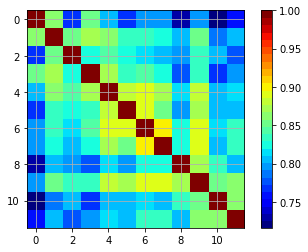

In [93]:
#Ploting the correlation table

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.iloc[:, 5:17].corr(), interpolation = 'nearest', cmap = cmap)
ax1.grid(True)
fig.colorbar(cax)
plt.show()

In [94]:
# Two main groups can be created from the question columns, to simplify the dataset: one can be named Course_valuation, the other as instructor valuation

data['Course_valuation'] = data['Q1']+data['Q2']+data['Q3']+data['Q4']+data['Q5']+data['Q6']+data['Q7']+data['Q8']+data['Q9']+data['Q10']+data['Q11']+data['Q12']

In [95]:
data['Course_valuation'].head()

0    36
1    36
2    60
3    36
4    12
Name: Course_valuation, dtype: int64

In [96]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Course_valuation
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,36
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,36
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,60
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,36
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,12


In [97]:
data['Instructor_valuation'] = data['Q13']+data['Q14']+data['Q15']+data['Q16']+data['Q17']+data['Q18']+data['Q19']+data['Q20']+data['Q21']+data['Q22']+data['Q23']+data['Q24']+data['Q25']+data['Q26']+data['Q27']+data['Q28']

In [98]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Course_valuation,Instructor_valuation
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,36,48
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,36,48
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,60,80
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,36,48
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,12,16


In [99]:
del data['Q1']

In [100]:
delete = ['Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28'] # Selecting the columns to delete

In [101]:
for item in delete:
    del data[item]

In [102]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Course_valuation,Instructor_valuation
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,36,48
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,36,48
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,60,80
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,36,48
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,12,16


In [103]:
del2 = ['Q2', 'Q3', 'Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12']

In [104]:
for item in del2:
    del data[item]

In [105]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Course_valuation,Instructor_valuation
0,1,2,1,0,4,36,48
1,1,2,1,1,3,36,48
2,1,2,1,2,4,60,80
3,1,2,1,1,3,36,48
4,1,2,1,0,1,12,16


In [106]:
# Creating dummy variables for the categorical columns

label = LabelEncoder()

In [107]:
to_label = ['instr', 'class', 'nb.repeat', 'attendance']

In [108]:
for item in to_label:
    label.fit_transform(data[item])

In [109]:
dummy_inst = pd.get_dummies(data['instr'], drop_first = True, prefix = ['instrument'])

In [110]:
dummy_class = pd.get_dummies(data['class'], drop_first = True, prefix = ['class'])

In [111]:
dummy_repeat = pd.get_dummies(data['nb.repeat'], drop_first = True, prefix = ['repeat'])

In [112]:
dummy_attendance = pd.get_dummies(data['attendance'], drop_first = True, prefix = ['attendance'])

In [113]:
lista = [dummy_inst, dummy_class, dummy_repeat, dummy_attendance]

In [114]:
for item in lista:
    data = pd.concat([data, item], axis = 1)

In [115]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Course_valuation,Instructor_valuation,['instrument']_2,['instrument']_3,['class']_2,...,['class']_10,['class']_11,['class']_12,['class']_13,['repeat']_2,['repeat']_3,['attendance']_1,['attendance']_2,['attendance']_3,['attendance']_4
0,1,2,1,0,4,36,48,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,1,3,36,48,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,2,1,2,4,60,80,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,2,1,1,3,36,48,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,2,1,0,1,12,16,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [116]:
del data['instr']

In [117]:
del data['class']

In [118]:
del data['nb.repeat']

In [119]:
del data['attendance']

In [120]:
data.corr()

,difficulty,Course_valuation,Instructor_valuation,['instrument']_2,['instrument']_3,['class']_2,['class']_3,['class']_4,['class']_5,['class']_6,...,['class']_10,['class']_11,['class']_12,['class']_13,['repeat']_2,['repeat']_3,['attendance']_1,['attendance']_2,['attendance']_3,['attendance']_4
difficulty,1.000000,0.060145,0.088566,-0.044351,-0.023447,0.076743,0.006229,-0.018431,0.031024,-0.043782,...,-0.022465,0.052490,0.007427,-0.098155,0.063431,0.085606,0.135131,0.146547,0.212367,0.163410
Course_valuation,0.060145,1.000000,0.901701,0.094319,-0.141775,0.059205,-0.061352,-0.050853,0.005258,0.058349,...,0.082616,0.039293,-0.017935,-0.101705,-0.029597,-0.018866,-0.043112,0.022464,0.090130,0.090106
Instructor_valuation,0.088566,0.901701,1.000000,0.106064,-0.128602,0.050140,-0.076094,-0.028702,0.003808,0.058957,...,0.045169,0.050994,-0.016706,-0.102766,-0.035235,-0.028003,-0.045863,0.032605,0.117729,0.103261
['instrument']_2,-0.044351,0.094319,0.106064,1.000000,-0.731775,-0.090185,-0.246333,-0.104664,-0.204740,0.566887,...,-0.165888,0.524288,-0.048385,-0.124074,-0.022529,-0.095848,0.037494,0.016820,0.006163,0.021556
['instrument']_3,-0.023447,-0.141775,-0.128602,-0.731775,1.000000,-0.199997,0.336624,0.143027,0.279786,-0.414834,...,-0.367878,-0.383661,0.066120,0.223013,0.069435,0.099829,-0.047359,-0.016542,-0.048770,-0.039589
['class']_2,0.076743,0.059205,0.050140,-0.090185,-0.199997,1.000000,-0.067324,-0.028605,-0.055956,-0.051125,...,-0.045338,-0.047283,-0.013224,-0.064523,-0.025745,-0.024355,0.030204,0.006373,0.046076,-0.007478
['class']_3,0.006229,-0.061352,-0.076094,-0.246333,0.336624,-0.067324,1.000000,-0.078132,-0.152840,-0.139643,...,-0.123837,-0.129150,-0.036120,-0.176240,-0.003921,-0.026547,-0.025718,0.031794,-0.052490,-0.023426
['class']_4,-0.018431,-0.050853,-0.028702,-0.104664,0.143027,-0.028605,-0.078132,1.000000,-0.064940,-0.059332,...,-0.052616,-0.054874,-0.015347,-0.074882,0.004871,0.009355,-0.023072,-0.015480,0.027915,-0.041970
['class']_5,0.031024,0.005258,0.003808,-0.204740,0.279786,-0.055956,-0.152840,-0.064940,1.000000,-0.116065,...,-0.102927,-0.107343,-0.030021,-0.146482,-0.067180,-0.048426,-0.034009,0.020172,0.031577,-0.011340
['class']_6,-0.043782,0.058349,0.058957,0.566887,-0.414834,-0.051125,-0.139643,-0.059332,-0.116065,1.000000,...,-0.094040,-0.098075,-0.027429,-0.133835,-0.000439,-0.057927,0.040460,0.025643,-0.002893,-0.001840


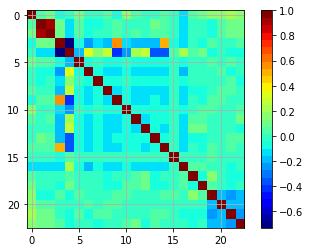

In [121]:
#Ploting the correlation table

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.iloc[:, :].corr(), interpolation = 'nearest', cmap = cmap)
ax1.grid(True)
fig.colorbar(cax)
plt.show()

In [122]:
# Standardizing the data
stand = StandardScaler()

In [123]:
stand.fit_transform(data.values)

array([[ 0.90186151, -0.07507307, -0.21751485, ..., -0.39688525,
        -0.52352704, -0.41241295],
       [ 0.16050078, -0.07507307, -0.21751485, ..., -0.39688525,
        -0.52352704, -0.41241295],
       [ 0.90186151,  1.62062658,  1.45977756, ...,  2.51961998,
        -0.52352704, -0.41241295],
       ...,
       [ 0.90186151,  1.62062658,  1.45977756, ..., -0.39688525,
        -0.52352704, -0.41241295],
       [-0.58085995, -1.77077272, -1.89480727, ..., -0.39688525,
        -0.52352704, -0.41241295],
       [-0.58085995, -1.77077272, -1.89480727, ..., -0.39688525,
        -0.52352704, -0.41241295]])

In [124]:
wcss = []

In [125]:
# Looking for the best cluster number and plotting it below
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(data.values)
    wcss.append(kmeans.inertia_)

In [126]:
print(wcss)

[3306307.7726804125, 1275398.3371759267, 555792.9865476794, 355727.2689326686, 240690.78376075937, 188917.1686605273, 162296.1277674356, 142681.03048897302, 130211.83324410117, 120441.5875882971]


In [127]:
K = range(1,11)

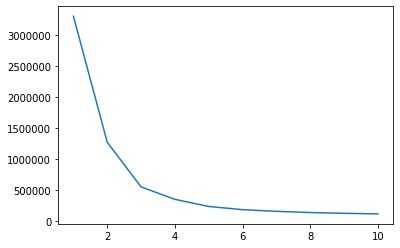

In [128]:
plt.plot(K, wcss)
plt.show()

In [129]:
# fitting with the best cluster number

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10)

In [130]:
kmeans.fit(data.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
data['y_pred'] = kmeans.predict(data.values)

In [82]:
from sklearn.decomposition import PCA

In [133]:
print(data.iloc[:,:-1].head())

   difficulty  Course_valuation  Instructor_valuation  ['instrument']_2  \
0           4                36                    48                 0   
1           3                36                    48                 0   
2           4                60                    80                 0   
3           3                36                    48                 0   
4           1                12                    16                 0   

   ['instrument']_3  ['class']_2  ['class']_3  ['class']_4  ['class']_5  \
0                 0            1            0            0            0   
1                 0            1            0            0            0   
2                 0            1            0            0            0   
3                 0            1            0            0            0   
4                 0            1            0            0            0   

   ['class']_6  ...  ['class']_10  ['class']_11  ['class']_12  ['class']_13  \
0            0  ...

In [138]:
# Component reduction 

pca = PCA(n_components = 2).fit(data.iloc[:,:-1])

In [135]:
pca2d = pca.transform(data.iloc[:,:-1])

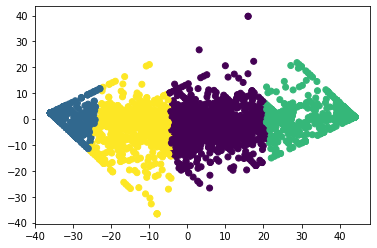

In [136]:
plt.scatter(pca2d[:,0], pca2d[:,1], c = data.y_pred)

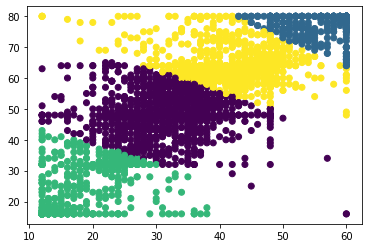

In [137]:
# Just a tip about which components are the most significant

plt.scatter(data.Course_valuation, data.Instructor_valuation, c = data.y_pred)